# Analyse the datasets


In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the first CSV file of 168
Import the first csv-file from the UK smartmeter data set found [here](https://data.london.gov.uk/dataset/smartmeter-energy-use-data-in-london-households) and analyse it graphically.

In [121]:
data = pd.read_csv('uk-smart-meter-data/LCL-June2015v2_0.csv')
data.head(10)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
5,MAC000002,Std,2012-10-12 03:00:00.0000000,0
6,MAC000002,Std,2012-10-12 03:30:00.0000000,0
7,MAC000002,Std,2012-10-12 04:00:00.0000000,0
8,MAC000002,Std,2012-10-12 04:30:00.0000000,0
9,MAC000002,Std,2012-10-12 05:00:00.0000000,0


## Number of households in the first file

In [122]:
data['LCLid'].nunique()

30

## Load the tariff data set

In [123]:
tariff_data = pd.read_excel('uk-smart-meter-data/Tariffs.xlsx')
tariff_data.head(10)

,TariffDateTime,Tariff
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
5,2013-01-01 02:30:00,Normal
6,2013-01-01 03:00:00,Normal
7,2013-01-01 03:30:00,Normal
8,2013-01-01 04:00:00,Normal
9,2013-01-01 04:30:00,Normal


In [124]:
tariff_data.dtypes

TariffDateTime    datetime64[ns]
Tariff                    object
dtype: object

In [125]:
tariff_data.loc[tariff_data['Tariff'] == 'Normal', 'Tariff'] = 0
tariff_data.loc[tariff_data['Tariff'] == 'Low', 'Tariff'] = -1
tariff_data.loc[tariff_data['Tariff'] == 'High', 'Tariff'] = 1
tariff_data.head(10)

,TariffDateTime,Tariff
0,2013-01-01 00:00:00,0
1,2013-01-01 00:30:00,0
2,2013-01-01 01:00:00,0
3,2013-01-01 01:30:00,0
4,2013-01-01 02:00:00,0
5,2013-01-01 02:30:00,0
6,2013-01-01 03:00:00,0
7,2013-01-01 03:30:00,0
8,2013-01-01 04:00:00,0
9,2013-01-01 04:30:00,0


In [126]:
data[data['KWH/hh (per half hour) '] == 'Null'].count()

LCLid                      29
stdorToU                   29
DateTime                   29
KWH/hh (per half hour)     29
dtype: int64

## Transform data and coerce Null

In [127]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['KWH/hh (per half hour) '] = pd.to_numeric(data['KWH/hh (per half hour) '], errors='coerce')
data['KWH/hh (per half hour) '].nunique()


4800

## Select a couple of households

In [128]:
data_first_five_ids = data[data['LCLid'].isin(data['LCLid'].unique()[15:20])]
unique_lclid_count = data_first_five_ids['LCLid'].nunique()
data_first_five_ids.dtypes

LCLid                              object
stdorToU                           object
DateTime                   datetime64[ns]
KWH/hh (per half hour)            float64
dtype: object

In [129]:
data_first_five_ids.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
443856,MAC000021,Std,2011-12-07 10:00:00,0.491
443857,MAC000021,Std,2011-12-07 10:30:00,0.346
443858,MAC000021,Std,2011-12-07 11:00:00,0.473
443859,MAC000021,Std,2011-12-07 11:30:00,0.456
443860,MAC000021,Std,2011-12-07 12:00:00,0.432


In [130]:
# lines = data_first_five_ids.plot.line(x='DateTime', y='KWH/hh (per half hour) ', figsize=(10, 6), title='Energy consumption for first LCLid')

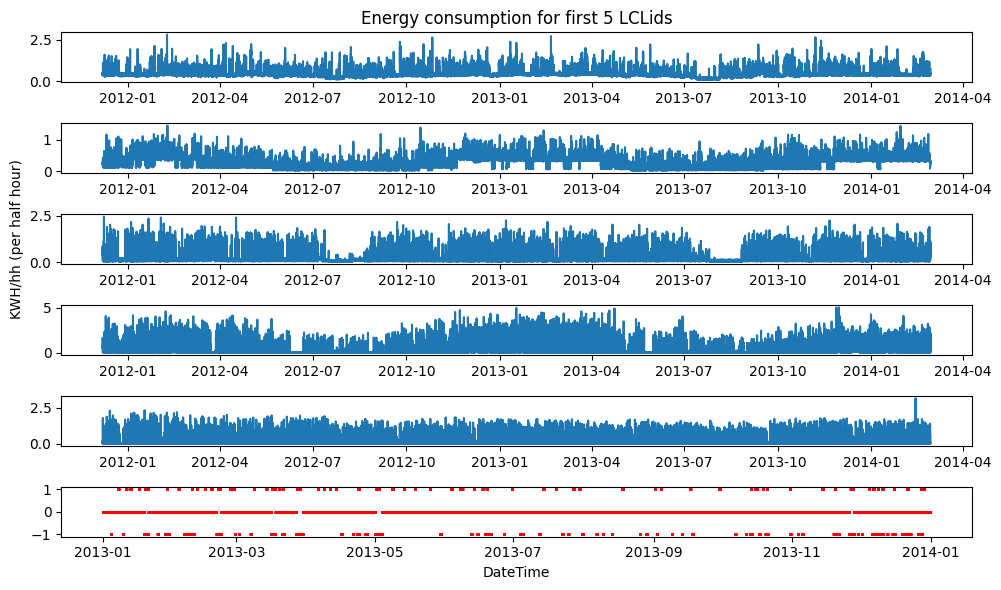

In [131]:
fig, axs = plt.subplots(unique_lclid_count + 1, 1, figsize=(10, 6))

for i, lclid in enumerate(data_first_five_ids['LCLid'].unique()):
    df = data_first_five_ids[data_first_five_ids['LCLid'] == lclid]
    ax = axs[i]
    ax.plot(df['DateTime'], df['KWH/hh (per half hour) '])

axs[2].set_ylabel('KWH/hh (per half hour)')
axs[0].set_title(f'Energy consumption for first 5 LCLids')
axs[-1].set_xlabel('DateTime')

axs[-1].scatter(tariff_data['TariffDateTime'], tariff_data['Tariff'], color='red', s=1)

plt.tight_layout()
plt.show()
